# Exploring the New Data
This notebook generates some statistics within the dataset (at least the labelled one). Some of the code was adapted from original paper's [repository](https://github.com/jonxuxu/harvest-piles).

In [1]:
# import necessary packages
from osgeo import gdal
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np

In [6]:
FOLDER_PATH = "../Dataset"
df = pd.read_csv(os.path.join(FOLDER_PATH, "new_labels_all.csv"))
df = df.iloc[:, 1:]

random_seed = 42
df.head(10)

,Unnamed: 0,filename,lat_1,lon_1,lat_2,lon_2,activity,altitude,lat_mean,lon_mean,year,month,day,group
0,3807,16965_1.tif,14.114066,36.939437,14.111717,36.941785,0.0,783,14.112892,36.940611,2021.0,4.0,3.0,-1
1,3807,16965_2.tif,14.114066,36.939437,14.111717,36.941785,0.0,783,14.112892,36.940611,2021.0,4.0,3.0,-1
2,3807,16965_3.tif,14.114066,36.939437,14.111717,36.941785,0.0,783,14.112892,36.940611,2021.0,4.0,3.0,-1
3,3807,16965_4.tif,14.114066,36.939437,14.111717,36.941785,0.0,783,14.112892,36.940611,2021.0,4.0,3.0,-1
4,4361,22851_1.tif,12.960310,39.512394,12.957991,39.514714,1.0,2709,12.959150,39.513554,2022.0,12.0,8.0,-1
5,4361,22851_2.tif,12.960310,39.512394,12.957991,39.514714,0.0,2709,12.959150,39.513554,2022.0,12.0,8.0,-1
6,4361,22851_3.tif,12.960310,39.512394,12.957991,39.514714,1.0,2709,12.959150,39.513554,2022.0,12.0,8.0,-1
7,4361,22851_4.tif,12.960310,39.512394,12.957991,39.514714,1.0,2709,12.959150,39.513554,2022.0,12.0,8.0,-1
8,4512,23444_1.tif,13.106436,39.540228,13.104116,39.542547,0.0,2091,13.105276,39.541387,2022.0,12.0,8.0,-1
9,4512,23444_2.tif,13.106436,39.540228,13.104116,39.542547,0.0,2091,13.105276,39.541387,2022.0,12.0,8.0,-1


In [7]:
len(df)

27660

In [8]:
positives = df[df["activity"] == 1]
negatives  = df[df["activity"] == 0]

print(f"Number of positives: {len(positives)}")
print(f"Number of negatives: {len(negatives)}")

Number of positives: 3409
Number of negatives: 24251


As seen above, there is now more imbalance between positives and the negatives on the dataset.

Now, we want to see what the general appearance of a satellite image if it was labelled positive and negative, i.e., presence and absence of harvest piles.

In [9]:
def load_geotiff(file):
    ds = gdal.Open(file)
    band1 = ds.GetRasterBand(1).ReadAsArray() # Red channel
    band2 = ds.GetRasterBand(2).ReadAsArray() # Green channel
    band3 = ds.GetRasterBand(3).ReadAsArray() # Blue channel
    img = np.dstack((band1, band2, band3))
    return img

In [10]:
IMAGE_PATH = "../Dataset/patch_images/"
images = []
coords = []
for _, row in positives.sample(n=20, random_state=42).iterrows():
    path = os.path.join(IMAGE_PATH, row["filename"])
    image = load_geotiff(path)
    images.append(image)
    coords.append((round(row['lat_mean'], 2), round(row['lon_mean'], 2)))

c:\Users\esl26\AppData\Local\anaconda3\envs\harvest\lib\site-packages\osgeo\gdal.py:312: FutureWarning: Neither gdal.UseExceptions() nor gdal.DontUseExceptions() has been explicitly called. In GDAL 4.0, exceptions will be enabled by default.
  warnings.warn(


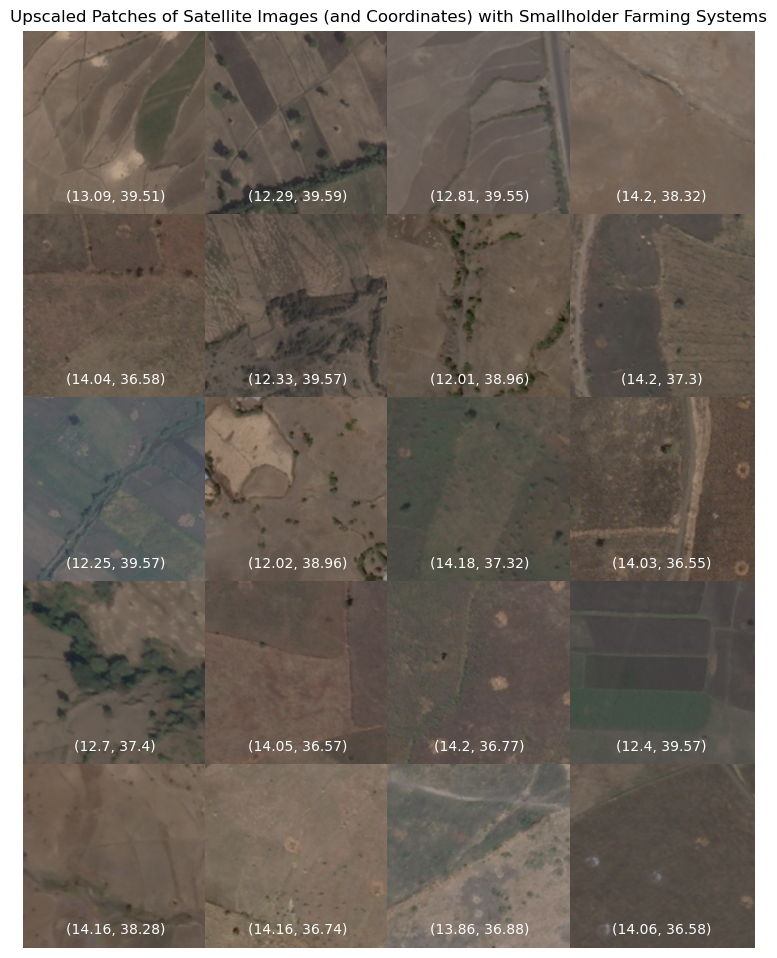

In [13]:
# Create a 4x4 subplot layout
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 10))

# Loop through the images and plot them in the subplot layout
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Change cmap and other options as needed
    ax.axis('off')  # Turn off axes labels and ticks
    ax.annotate(f"{coords[i]}", xy=(0.5, 0.5), xytext=(0.5, 0.1),
                xycoords='axes fraction', textcoords='axes fraction',
                fontsize=10, color='white', ha='center', va='center')

# Adjust spacing and layout
plt.tight_layout(pad=2.5, h_pad=-1, w_pad=0)

# Add title
plt.suptitle("Upscaled Patches of Satellite Images (and Coordinates) with Smallholder Farming Systems")

# Download the figure
plt.savefig("../figures/positive-grid-new.png", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace

# Show the plot
plt.show()

In [14]:
images = []
for _, row in negatives.sample(n=20, random_state=42).iterrows():
    path = os.path.join(IMAGE_PATH, row["filename"])
    image = load_geotiff(path)
    images.append(image)
    coords.append((round(row['lat_mean'], 2), round(row['lon_mean'], 2)))

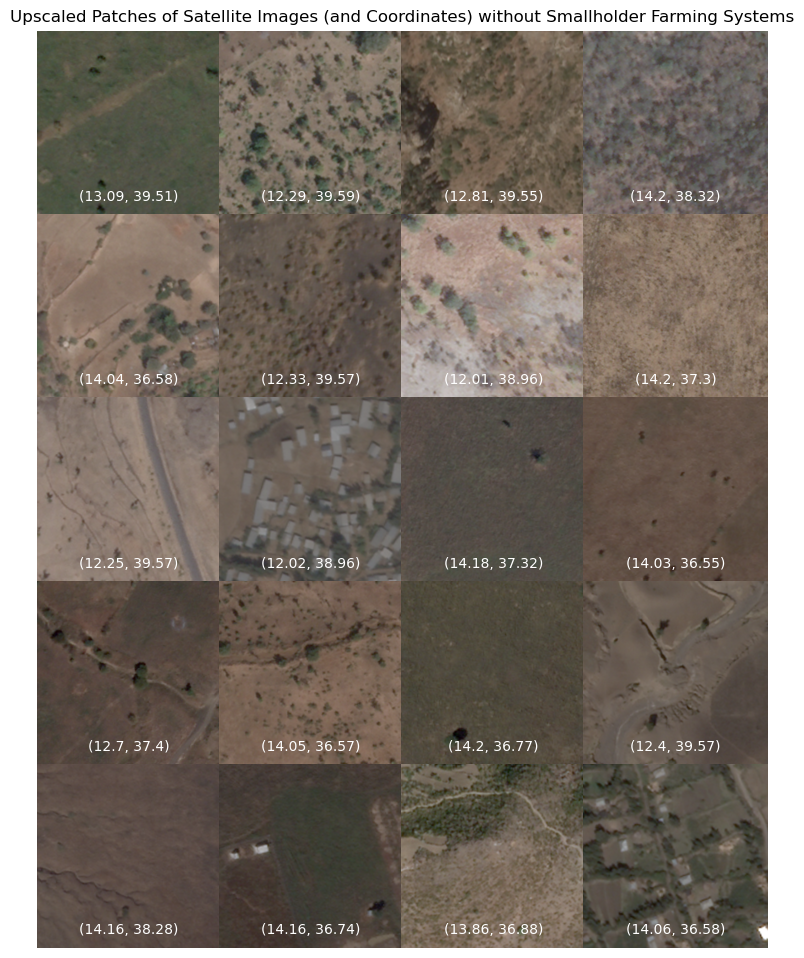

In [15]:
# Create a 4x4 subplot layout
fig, axes = plt.subplots(nrows=5, ncols=4, figsize=(8, 10))

# Loop through the images and plot them in the subplot layout
for i, ax in enumerate(axes.flat):
    ax.imshow(images[i], cmap='gray')  # Change cmap and other options as needed
    ax.axis('off')  # Turn off axes labels and ticks
    ax.annotate(f"{coords[i]}", xy=(0.5, 0.5), xytext=(0.5, 0.1),
                xycoords='axes fraction', textcoords='axes fraction',
                fontsize=10, color='white', ha='center', va='center')

# Adjust spacing and layout
plt.tight_layout(pad=2.5, h_pad=-1, w_pad=0)

# Add title
plt.suptitle("Upscaled Patches of Satellite Images (and Coordinates) without Smallholder Farming Systems")

# Download the figure
plt.savefig("../figures/negative-grid-new.png", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace

# Show the plot
plt.show()

Let's further explore the split between the training and test set from the paper.

In [16]:
train_df = pd.read_csv(os.path.join(FOLDER_PATH, "new_train.csv"))
train_df = train_df.iloc[:, 1:]
test_df = pd.read_csv(os.path.join(FOLDER_PATH, "new_test.csv"))
test_df = test_df.iloc[:, 1:]
labelled = pd.read_csv(os.path.join(FOLDER_PATH, "new_labels_all.csv"))
labelled = labelled.iloc[:, 1:]

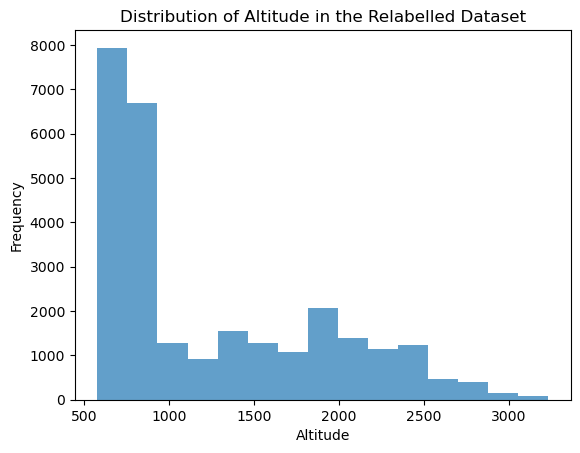

In [17]:
# Create a histogram for the train and test data
plt.hist([labelled['altitude']], bins=15, alpha=0.7, stacked=False)

# Add labels and title
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Distribution of Altitude in the Relabelled Dataset')

# Show the plot
plt.savefig("../figures/alt-dist-new", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace
plt.show()


In [18]:
pos_train = train_df[train_df["activity"] == 1]
neg_train = train_df[train_df["activity"] == 0]
pos_test = test_df[test_df["activity"] == 1]
neg_test = test_df[test_df["activity"] == 0]

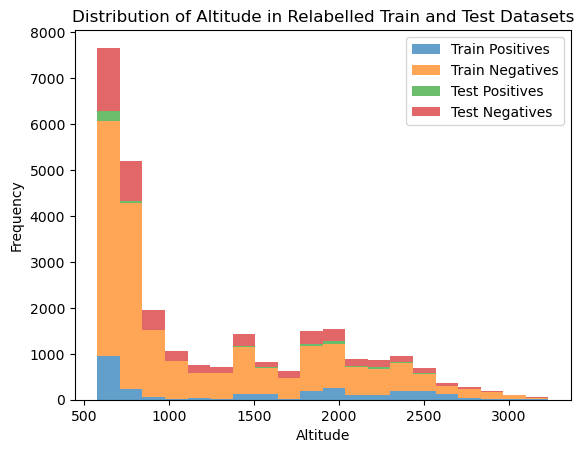

In [19]:
# Create a histogram for the train and test data
field = "altitude"
plt.hist([pos_train[field], neg_train[field],pos_test[field], neg_test[field]], bins=20, label=['Train Positives', 'Train Negatives','Test Positives', 'Test Negatives'], alpha=0.7, stacked=True)

# Add labels and title
plt.xlabel('Altitude')
plt.ylabel('Frequency')
plt.title('Distribution of Altitude in Relabelled Train and Test Datasets')
plt.legend()

# Show the plot
plt.savefig("../figures/alt-dist-pos-neg-new", bbox_inches='tight')  # bbox_inches='tight' removes extra whitespace
plt.show()
